In [1]:
# Este conjunto de dados contém dados sobre 22.000 carros do carvana.com. 
# Usando esses dados, podemos obter novos insights sobre os preços dos carros 
# e podemos desenvolver modelos preditivos para prever o custo do carro, 
# considerando sua marca e modelo, ano e quilometragem.

# Tarefas:
    
# > Crie um modelo preditivo para calcular o preço do carro.
# > Usando processamento de linguagem natural, crie um algoritmo 
#   para encontrar o PREÇO de um carro dado seu NOME (MARCA e MODELO).
# > Existe uma correlação/relação entre o ano de um carro e o preço de um carro?
# > Existe uma correlação/relação entre a quilometragem de um carro e o preço de um carro?


# Detalhes dos dados:
    
# - Os dados foram extraídos da web de carvana.com/cars.
# - Existem 22.000 linhas de dados (primeiras 1.000 páginas do site).
# - A coluna de nome contém a marca e o modelo do carro.
# - Os carros são usados e a coluna de milhas diz o número de milhas que o carro já dirigiu.
# - O preço do carro está em USD.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import plotly.graph_objects as go

%matplotlib inline

import nltk # pip install nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

import requests
from io import BytesIO
from zipfile import ZipFile

import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
# from sklearn.svm import LinearSVR
# from sklearn.tree import ExtraTreeRegressor
# from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import LabelEncoder

# from sklearn.linear_model import PassiveAggressiveRegressor
# from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import HuberRegressor
# from sklearn.linear_model import OrthogonalMatchingPursuit
# from sklearn.linear_model import RANSACRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import HistGradientBoostingRegressor
# from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv(r"C:\Users\Thalles Rodrigues\Documents\CSVs/carvana.csv")

In [4]:
df

Name   Year  Miles  Price
0                 Chevrolet Trax   2018  41946  16990
1                    GMC Terrain   2020  45328  23990
2                  Jeep Wrangler   2012  81068  21590
3                  Jeep Renegade   2019  35372  21590
4                          BMW X  20173  68992  22990
...                          ...    ...    ...    ...
21995               Honda Accord   2014  98085  17590
21996              Dodge Charger   2016  62616  23990
21997                Ford Taurus   2013  50345  16990
21998   Toyota Corolla Hatchback   2020  27945  23990
21999                Honda Civic   2012  70676  14990

[22000 rows x 4 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [6]:
df.isna().sum()

Name     0
Year     0
Miles    0
Price    0
dtype: int64

In [7]:
df['Company']=df['Name'].apply(lambda x: x.split()[0])

In [8]:
df

Name   Year  Miles  Price    Company
0                 Chevrolet Trax   2018  41946  16990  Chevrolet
1                    GMC Terrain   2020  45328  23990        GMC
2                  Jeep Wrangler   2012  81068  21590       Jeep
3                  Jeep Renegade   2019  35372  21590       Jeep
4                          BMW X  20173  68992  22990        BMW
...                          ...    ...    ...    ...        ...
21995               Honda Accord   2014  98085  17590      Honda
21996              Dodge Charger   2016  62616  23990      Dodge
21997                Ford Taurus   2013  50345  16990       Ford
21998   Toyota Corolla Hatchback   2020  27945  23990     Toyota
21999                Honda Civic   2012  70676  14990      Honda

[22000 rows x 5 columns]

In [9]:
df.Company.value_counts()

Toyota           2636
Nissan           2484
Honda            1972
Hyundai          1761
Chevrolet        1704
Kia              1703
Ford             1637
Jeep             1028
Volkswagen        858
MAZDA             622
BMW               579
Acura             542
Dodge             457
Lexus             428
FIAT              391
Buick             377
Chrysler          331
Subaru            315
Mercedes-Benz     303
GMC               263
Mitsubishi        238
MINI              235
INFINITI          173
Lincoln           169
Audi              158
Volvo             134
Cadillac          129
Tesla              85
Scion              76
Ram                48
Jaguar             37
Land               36
smart              30
Porsche            18
Alfa               13
Genesis            13
Maserati            9
Saturn              4
Polestar            2
Pontiac             2
Name: Company, dtype: int64

In [10]:
df['Name'] = df['Name'].str.split().str[1:].str.join(' ')

In [11]:
df

Name   Year  Miles  Price    Company
0                   Trax   2018  41946  16990  Chevrolet
1                Terrain   2020  45328  23990        GMC
2               Wrangler   2012  81068  21590       Jeep
3               Renegade   2019  35372  21590       Jeep
4                      X  20173  68992  22990        BMW
...                  ...    ...    ...    ...        ...
21995             Accord   2014  98085  17590      Honda
21996            Charger   2016  62616  23990      Dodge
21997             Taurus   2013  50345  16990       Ford
21998  Corolla Hatchback   2020  27945  23990     Toyota
21999              Civic   2012  70676  14990      Honda

[22000 rows x 5 columns]

In [12]:
df = df.rename(columns={'Name': 'Car'})

In [13]:
df

Car   Year  Miles  Price    Company
0                   Trax   2018  41946  16990  Chevrolet
1                Terrain   2020  45328  23990        GMC
2               Wrangler   2012  81068  21590       Jeep
3               Renegade   2019  35372  21590       Jeep
4                      X  20173  68992  22990        BMW
...                  ...    ...    ...    ...        ...
21995             Accord   2014  98085  17590      Honda
21996            Charger   2016  62616  23990      Dodge
21997             Taurus   2013  50345  16990       Ford
21998  Corolla Hatchback   2020  27945  23990     Toyota
21999              Civic   2012  70676  14990      Honda

[22000 rows x 5 columns]

In [14]:
df.Car.value_counts()

Corolla             835
Elantra             738
Camry               725
Rogue               528
Accord              521
                   ... 
C-MAX Energi          1
Grand Cherokee L      1
Focus ST              1
SLC                   1
Transit Wagon         1
Name: Car, Length: 402, dtype: int64

In [15]:
df.loc[df['Car'] == 'camry']

Empty DataFrame
Columns: [Car, Year, Miles, Price, Company]
Index: []

In [16]:
# TIRAR PONTUAÇÃO E CARACTERES ESPECIAIS

def limpa_texto(data, col):
    data[col] = data[col].str.lower()
    data[col] = data[col].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "",x))

In [17]:
limpa_texto(df, 'Car')
limpa_texto(df, 'Company')

In [18]:
df.Year.value_counts()

2015       2542
2019       2281
2017       2152
2016       2107
2014       2053
           ... 
2018718       1
20191         1
20187         1
20211         1
20142         1
Name: Year, Length: 211, dtype: int64

In [19]:
df['Year'] = df['Year'].apply(lambda x: int(str(x)[:4]))

In [20]:
df

Car  Year  Miles  Price    Company
0                   trax  2018  41946  16990  chevrolet
1                terrain  2020  45328  23990        gmc
2               wrangler  2012  81068  21590       jeep
3               renegade  2019  35372  21590       jeep
4                      x  2017  68992  22990        bmw
...                  ...   ...    ...    ...        ...
21995             accord  2014  98085  17590      honda
21996            charger  2016  62616  23990      dodge
21997             taurus  2013  50345  16990       ford
21998  corolla hatchback  2020  27945  23990     toyota
21999              civic  2012  70676  14990      honda

[22000 rows x 5 columns]

In [21]:
df.Year.value_counts()

2015    2858
2014    2512
2016    2478
2017    2456
2019    2421
2018    1914
2020    1379
2021    1352
2013    1322
2012    1286
2011     773
2010     653
2022     426
2009     164
2023       6
Name: Year, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Car      22000 non-null  object
 1   Year     22000 non-null  int64 
 2   Miles    22000 non-null  int64 
 3   Price    22000 non-null  int64 
 4   Company  22000 non-null  object
dtypes: int64(3), object(2)
memory usage: 859.5+ KB


In [23]:
df.Miles.value_counts()

35929    220
21077    219
21314    218
48897    216
37208    216
        ... 
14371      1
9742       1
73018      1
91769      1
70676      1
Name: Miles, Length: 8836, dtype: int64

In [24]:
df.Price.value_counts()

17990    1581
19990    1117
16590    1086
24990    1002
16990    1000
         ... 
20991       1
20958       1
20062       1
22002       1
10990       1
Name: Price, Length: 866, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Car      22000 non-null  object
 1   Year     22000 non-null  int64 
 2   Miles    22000 non-null  int64 
 3   Price    22000 non-null  int64 
 4   Company  22000 non-null  object
dtypes: int64(3), object(2)
memory usage: 859.5+ KB


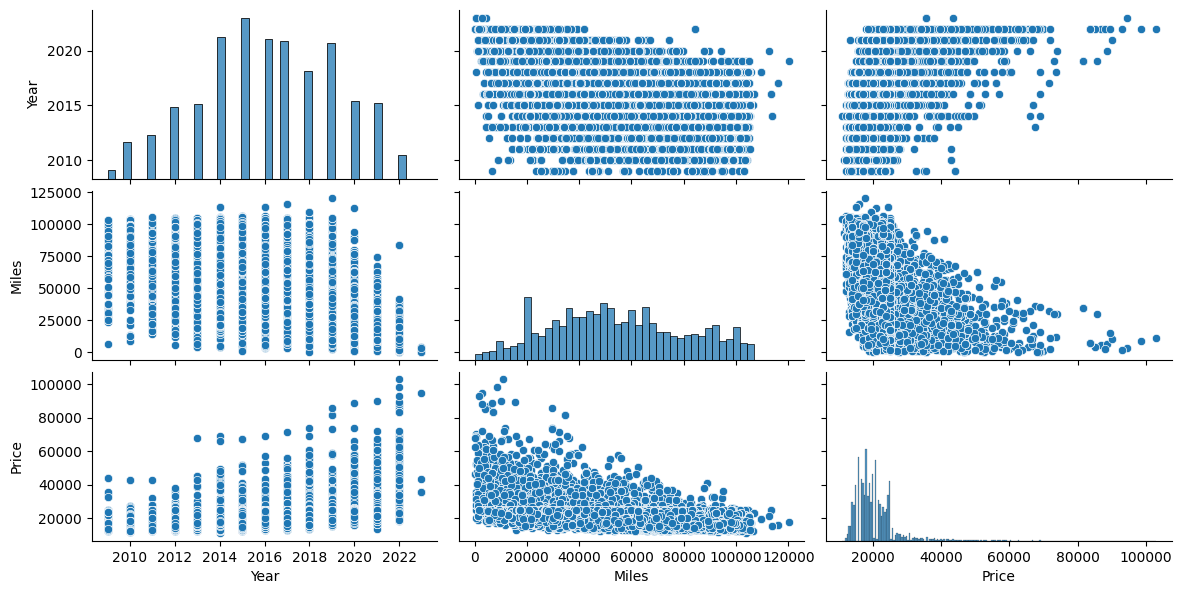

In [26]:
# Calcula a proporção de aspecto
aspect = 10 / 5

# Gera o pairplot com as dimensões ajustadas
sns.pairplot(df, height=2, aspect=aspect)

# Exibe a figura
plt.show()

In [27]:
# Correlação entre o ano e o preço
correlation = df['Year'].corr(df['Price'])
correlation

0.49175135771072137

<Axes: >

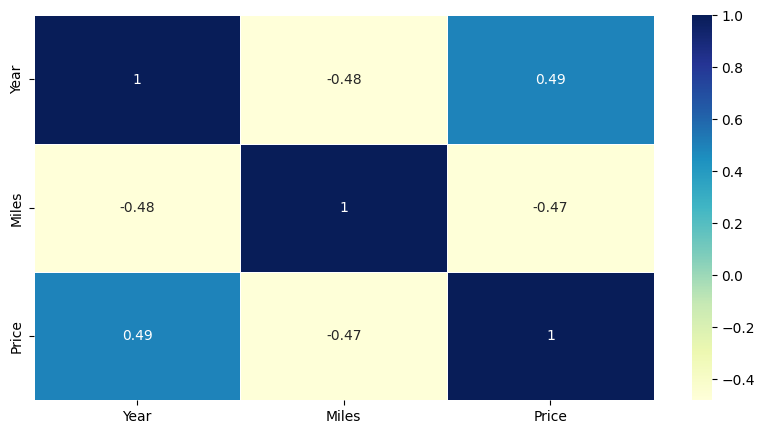

In [28]:
f, ax = plt.subplots(figsize=(10, 5))
features  = ['Year', 'Miles']
corr = df[features+['Price']].corr()

sns.heatmap(corr, annot=True, linewidths=.5,cmap="YlGnBu")

<Axes: xlabel='Year', ylabel='Price'>

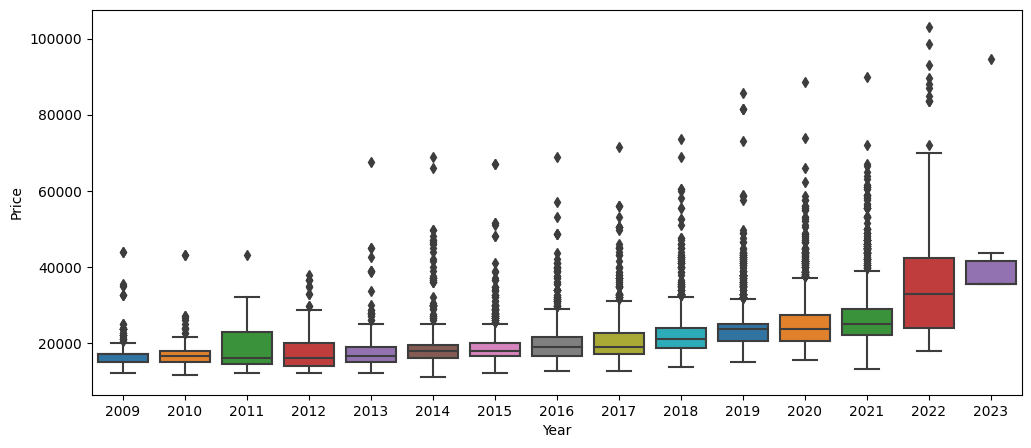

In [29]:
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='Year', y="Price", data=df, palette="tab10")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Car      22000 non-null  object
 1   Year     22000 non-null  int64 
 2   Miles    22000 non-null  int64 
 3   Price    22000 non-null  int64 
 4   Company  22000 non-null  object
dtypes: int64(3), object(2)
memory usage: 859.5+ KB


In [31]:
df_filtered = df[(df['Year'] >= 2009) & (df['Year'] <= 2022)]

q1 = np.percentile(df_filtered['Price'], 25)
q3 = np.percentile(df_filtered['Price'], 75)

lower_bound = q1 - 1.5 * (q3 - q1)
upper_bound = q3 + 1.5 * (q3 - q1)

df_outliers = df_filtered[(df_filtered['Price'] < lower_bound) | (df_filtered['Price'] > upper_bound)]

In [32]:
df_outliers

Car  Year  Miles  Price       Company
376                cclass  2019  12384  37990  mercedesbenz
393                    qx  2021  52400  43590      infiniti
447                cclass  2019  12384  37990  mercedesbenz
497     tacoma double cab  2022   8361  37990        toyota
499                    qx  2021  42874  48990      infiniti
...                   ...   ...    ...    ...           ...
10150            traverse  2021  41113  33598     chevrolet
10175            traverse  2021  41113  33598     chevrolet
10197            traverse  2021  38255  33775     chevrolet
10205  wrangler unlimited  2020  46230  33645          jeep
10267              camaro  2020  51805  35589     chevrolet

[967 rows x 5 columns]

In [33]:
df_outliers.Car.value_counts()

model                    56
corvette                 32
series                   31
tacoma double cab        24
camaro                   23
                         ..
rover discovery sport     1
frontier crew cab         1
gs                        1
glb                       1
wrx                       1
Name: Car, Length: 183, dtype: int64

In [34]:
df.Car.value_counts()

corolla             835
elantra             738
camry               725
rogue               528
accord              521
                   ... 
cmax energi           1
grand cherokee l      1
focus st              1
slc                   1
transit wagon         1
Name: Car, Length: 402, dtype: int64

In [35]:
df_outliers.loc[df_outliers['Car'] == 'model']

Car  Year  Miles  Price Company
3782  model  2019  21686  48990   tesla
3793  model  2019  19249  42590   tesla
3975  model  2021  10254  52990   tesla
3977  model  2021   3103  47990   tesla
3980  model  2020  33438  41590   tesla
4071  model  2022   7996  58590   tesla
4087  model  2020  37177  40990   tesla
4101  model  2019  25381  40990   tesla
4115  model  2020  15817  52590   tesla
4130  model  2021  10254  52990   tesla
4143  model  2021  18789  44590   tesla
4290  model  2021  15517  45990   tesla
4523  model  2019  21686  48990   tesla
4595  model  2020  22030  52990   tesla
4603  model  2020  37177  40990   tesla
4641  model  2018  30087  44990   tesla
4687  model  2020  12238  43990   tesla
4732  model  2020  22030  52990   tesla
4754  model  2019  19249  42590   tesla
4761  model  2021  25533  44590   tesla
4808  model  2020  24383  42590   tesla
4847  model  2020   4391  57590   tesla
4856  model  2022   3727  62590   tesla
4857  model  2021  15517  45990   tesla
4869  model  2021  25533  44590   tesla
4887  model  2020  17645  50590   tesla
4894  model  2021  17011  64990   tesla
4907  model  2021  13529  45590   tesla
4957  model  2019  28574  41590   tesla
4960  model  2020  37177  40990   tesla
4968  model  2022   7996  58590   tesla
5010  model  2020   6222  55590   tesla
5034  model  2021  22237  43990   tesla
5035  model  2021  10499  45590   tesla
5077  model  2018   4415  45990   tesla
5084  model  2022   3727  62590   tesla
5108  model  2022   3727  62590   tesla
5117  model  2021   9345  57590   tesla
5121  model  2021  10499  45590   tesla
5149  model  2022  10115  53990   tesla
5159  model  2021   9045  45990   tesla
5163  model  2022   7560  56590   tesla
5164  model  2020  30734  50990   tesla
5274  model  2019  45618  47590   tesla
5459  model  2019  17780  41990   tesla
5836  model  2018  30482  40990   tesla
5845  model  2022   4351  61590   tesla
5913  model  2021  35217  44990   tesla
6029  model  2021   6447  46990   tesla
6036  model  2021  35217  44990   tesla
6053  model  2018  34480  41990   tesla
6092  model  2021   6447  46990   tesla
6194  model  2018  41817  41590   tesla
6206  model  2018  34480  41990   tesla
6212  model  2021   6447  46990   tesla
6219  model  2021   3606  55590   tesla

In [36]:
df_outliers.Company.value_counts()

toyota          131
chevrolet       101
ford             86
tesla            85
bmw              61
mercedesbenz     45
lexus            45
jeep             36
honda            34
hyundai          32
kia              32
dodge            29
gmc              28
nissan           24
porsche          18
volvo            17
jaguar           16
cadillac         15
ram              15
chrysler         15
land             14
infiniti         13
volkswagen       13
acura            10
subaru           10
maserati          9
lincoln           8
audi              7
genesis           7
mazda             5
mini              2
polestar          2
alfa              1
buick             1
Name: Company, dtype: int64

In [37]:
df_outliers.Car.value_counts()

model                    56
corvette                 32
series                   31
tacoma double cab        24
camaro                   23
                         ..
rover discovery sport     1
frontier crew cab         1
gs                        1
glb                       1
wrx                       1
Name: Car, Length: 183, dtype: int64

<Axes: xlabel='Year', ylabel='Miles'>

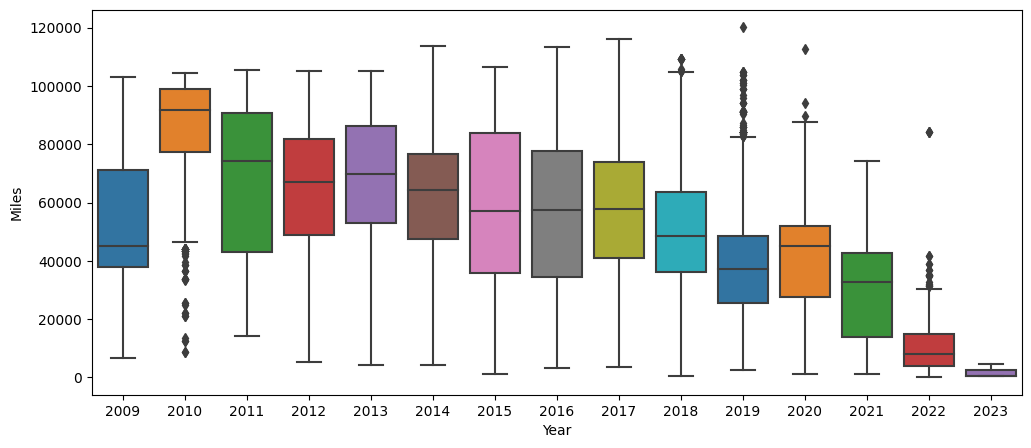

In [38]:
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='Year', y="Miles", data=df, palette="tab10")

In [39]:
# PORCENTAGEM DE OUTLIERS

def calculate_outlier_percentage(data, column_name):
    outlier_percentage = {}
    
    # Group the dataframe by year
    grouped_df = data.groupby('Year')
    
    # Iterate over each group
    for year, group in grouped_df:
        # Calculate the lower and upper bounds for outliers
        q1 = group[column_name].quantile(0.25)
        q3 = group[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Find outliers
        outliers = group[(group[column_name] < lower_bound) | (group[column_name] > upper_bound)]
        
        # Calculate the percentage of outliers
        total_values = len(group)
        outlier_count = len(outliers)
        percentage = (outlier_count / total_values) * 100
        
        outlier_percentage[year] = percentage
    
    return outlier_percentage

# Example usage
outlier_percentage_price = calculate_outlier_percentage(df, 'Price')
outlier_percentage_miles = calculate_outlier_percentage(df, 'Miles')

# Print the results
print("Outlier Percentage (Price):")
for year, percentage in outlier_percentage_price.items():
    print(f"Year {year}: {percentage}%")

print("\nOutlier Percentage (Miles):")
for year, percentage in outlier_percentage_miles.items():
    print(f"Year {year}: {percentage}%")


Outlier Percentage (Price):
Year 2009: 20.73170731707317%
Year 2010: 1.8376722817764166%
Year 2011: 0.129366106080207%
Year 2012: 0.7776049766718507%
Year 2013: 1.588502269288956%
Year 2014: 1.950636942675159%
Year 2015: 2.484254723582925%
Year 2016: 2.4213075060532687%
Year 2017: 2.44299674267101%
Year 2018: 4.179728317659352%
Year 2019: 5.5762081784386615%
Year 2020: 7.75924583031182%
Year 2021: 9.171597633136095%
Year 2022: 2.5821596244131455%
Year 2023: 16.666666666666664%

Outlier Percentage (Miles):
Year 2009: 0.0%
Year 2010: 6.431852986217458%
Year 2011: 0.0%
Year 2012: 0.0%
Year 2013: 0.0%
Year 2014: 0.0%
Year 2015: 0.0%
Year 2016: 0.0%
Year 2017: 0.0%
Year 2018: 0.5747126436781609%
Year 2019: 2.5196199917389506%
Year 2020: 0.21754894851341552%
Year 2021: 0.0%
Year 2022: 4.460093896713615%
Year 2023: 0.0%


In [40]:
graph=df.groupby(['Year','Company']).agg(count=('Company','count'))

In [41]:
graph

count
Year Company          
2009 bmw             8
     chevrolet       7
     ford            4
     honda          44
     infiniti        3
...                ...
2022 volkswagen      2
     volvo           2
2023 chevrolet       1
     kia             1
     mini            4

[416 rows x 1 columns]

C:\Users\Thalles Rodrigues\AppData\Local\Temp\ipykernel_71672\1769758426.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=18)
C:\Users\Thalles Rodrigues\AppData\Local\Temp\ipykernel_71672\1769758426.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=18)
C:\Users\Thalles Rodrigues\AppData\Local\Temp\ipykernel_71672\1769758426.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=18)
C:\Users\Thalles Rodrigues\AppData\Local\Temp\ipykernel_71672\1769758426.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(ax[2].get_yticklabels(), fontsize=18)  # Tamanho maior no subplot 3


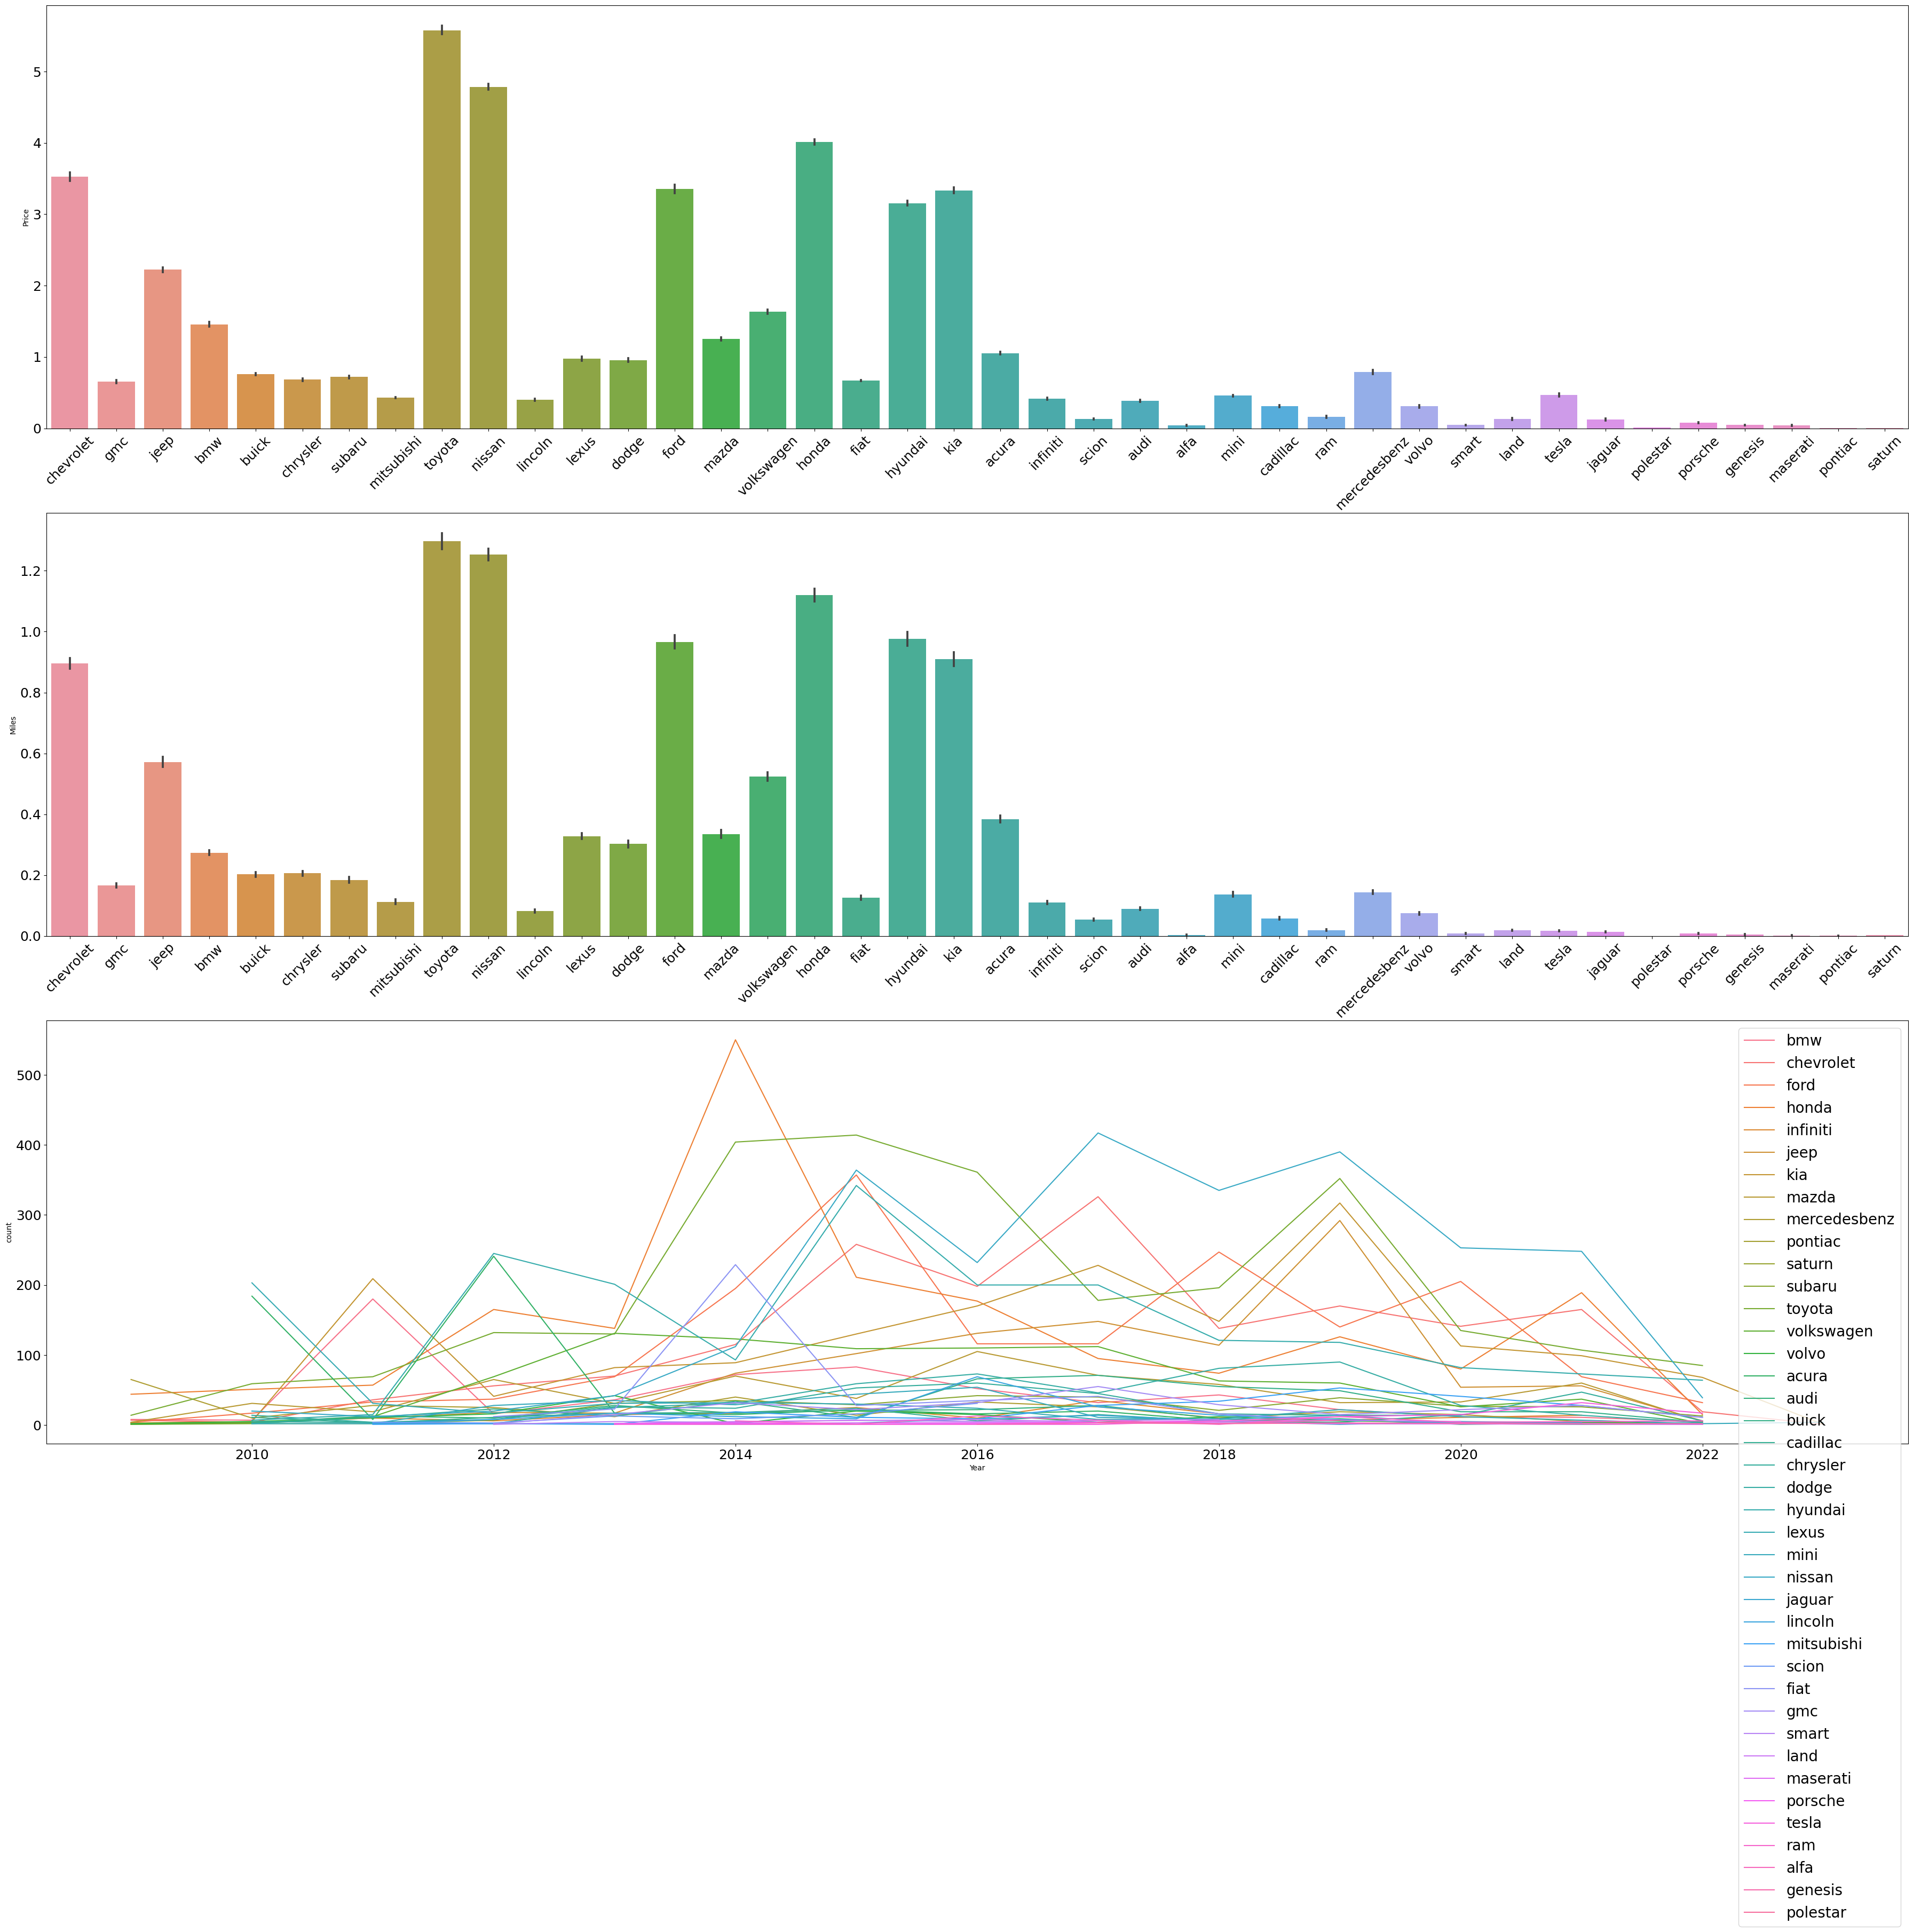

In [42]:
# top2

fig, ax = plt.subplots(3, 1, figsize=(45, 35))
sns.barplot(x='Company', y='Price', data=df, estimator=np.sum, ax=ax[0])
sns.barplot(x='Company', y='Miles', data=df, estimator=np.sum, ax=ax[1])
sns.lineplot(x='Year', y='count', hue='Company', data=graph, ax=ax[2], markers=True)

# Aumentar tamanho da fonte e inclinar rótulos do eixo x (subplots 1 e 2)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=18, rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=18, rotation=45)
ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=18)

# Aumentar tamanho da fonte do eixo y (todos os subplots)
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=18)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=18)
ax[2].set_yticklabels(ax[2].get_yticklabels(), fontsize=18)  # Tamanho maior no subplot 3

# Rotacionar rótulos do eixo x do subplot 3 para a horizontal
ax[2].tick_params(axis='x', rotation=0)

# Aumentar tamanho da legenda do subplot 3
ax[2].legend(fontsize=20)

plt.show()


In [43]:
# NÚVEM DE PALAVRAS

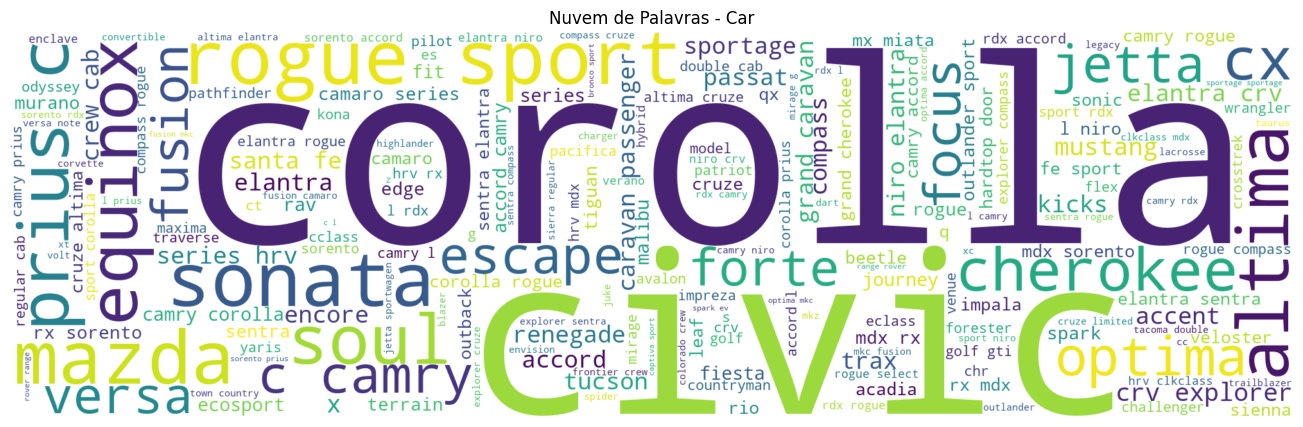

In [44]:
# Concatenando todos os valores da coluna "Car"
car_text = ' '.join(df['Car'].values)

# Criando a nuvem de palavras para a coluna "Car"
car_wordcloud = WordCloud(width=2000, height=600, background_color='white').generate(car_text)

# Plotando a nuvem de palavras para a coluna "Car"
plt.figure(figsize=(20, 5))
plt.imshow(car_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Car')
plt.show()


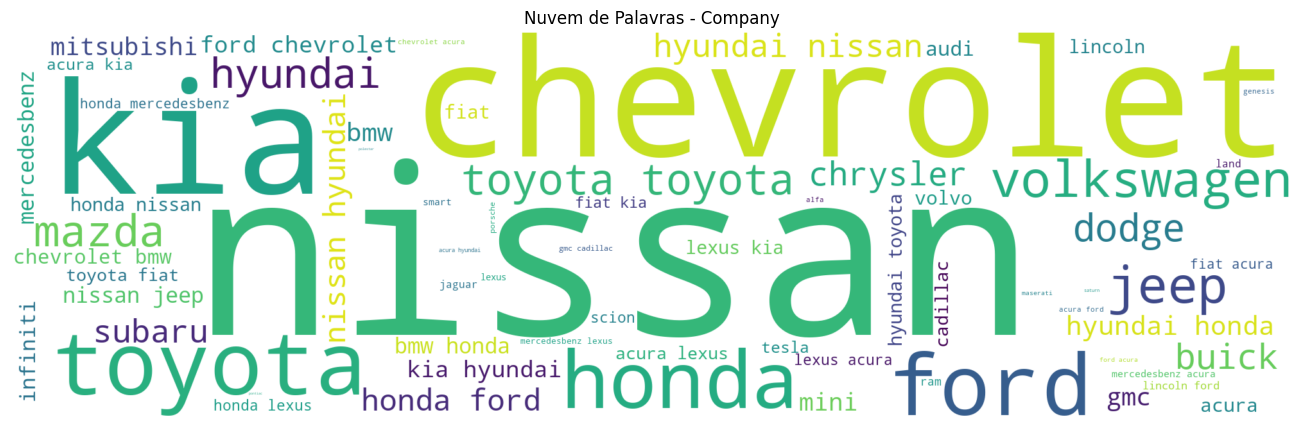

In [45]:
# Concatenando todos os valores da coluna "Company"
company_text = ' '.join(df['Company'].values)

# Criando a nuvem de palavras para a coluna "Company"
company_wordcloud = WordCloud(width=2000, height=600, background_color='white').generate(company_text)

# Plotando a nuvem de palavras para a coluna "Company"
plt.figure(figsize=(20, 5))
plt.imshow(company_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Company')
plt.show()

In [46]:
df

Car  Year  Miles  Price    Company
0                   trax  2018  41946  16990  chevrolet
1                terrain  2020  45328  23990        gmc
2               wrangler  2012  81068  21590       jeep
3               renegade  2019  35372  21590       jeep
4                      x  2017  68992  22990        bmw
...                  ...   ...    ...    ...        ...
21995             accord  2014  98085  17590      honda
21996            charger  2016  62616  23990      dodge
21997             taurus  2013  50345  16990       ford
21998  corolla hatchback  2020  27945  23990     toyota
21999              civic  2012  70676  14990      honda

[22000 rows x 5 columns]

In [47]:
# TREINAR MODELO

In [48]:
# > Usando processamento de linguagem natural, crie um algoritmo 
#   para encontrar o preço de um carro dado seu nome (marca e modelo).

In [49]:
variaveis = ["Car","Company"]
# categorical_var = "Name"

In [50]:
X = df[variaveis]
y = df["Price"]

In [51]:
X = pd.get_dummies(X)

In [52]:
df

Car  Year  Miles  Price    Company
0                   trax  2018  41946  16990  chevrolet
1                terrain  2020  45328  23990        gmc
2               wrangler  2012  81068  21590       jeep
3               renegade  2019  35372  21590       jeep
4                      x  2017  68992  22990        bmw
...                  ...   ...    ...    ...        ...
21995             accord  2014  98085  17590      honda
21996            charger  2016  62616  23990      dodge
21997             taurus  2013  50345  16990       ford
21998  corolla hatchback  2020  27945  23990     toyota
21999              civic  2012  70676  14990      honda

[22000 rows x 5 columns]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train

Car_  Car_a  Car_a sportback etron  Car_abarth  Car_acadia  \
5207      0      0                      0           0           0   
4450      0      0                      0           0           0   
7033      0      0                      0           0           0   
487       0      0                      0           0           0   
19537     0      0                      0           0           0   
...     ...    ...                    ...         ...         ...   
11964     0      0                      0           0           0   
21575     0      0                      0           0           0   
5390      0      0                      0           0           0   
860       0      0                      0           0           0   
15795     0      0                      0           0           0   

       Car_acadia limited  Car_accent  Car_accord  Car_accord crosstour  \
5207                    0           0           0                     0   
4450                    0           0           0                     0   
7033                    0           0           0                     0   
487                     0           0           0                     0   
19537                   0           0           0                     0   
...                   ...         ...         ...                   ...   
11964                   0           0           0                     0   
21575                   0           0           0                     0   
5390                    0           0           0                     0   
860                     0           0           0                     0   
15795                   0           0           0                     0   

       Car_accord hybrid  ...  Company_porsche  Company_ram  Company_saturn  \
5207                   0  ...                0            0               0   
4450                   0  ...                0            0               0   
7033                   0  ...                0            0               0   
487                    0  ...                0            0               0   
19537                  0  ...                0            0               0   
...                  ...  ...              ...          ...             ...   
11964                  0  ...                0            0               0   
21575                  0  ...                0            0               0   
5390                   0  ...                0            0               0   
860                    0  ...                0            0               0   
15795                  0  ...                0            0               0   

       Company_scion  Company_smart  Company_subaru  Company_tesla  \
5207               0              0               0              0   
4450               0              0               0              0   
7033               0              0               0              0   
487                0              0               0              0   
19537              0              0               0              0   
...              ...            ...             ...            ...   
11964              0              0               0              0   
21575              0              0               0              0   
5390               0              0               0              0   
860                0              0               0              0   
15795              0              0               0              0   

       Company_toyota  Company_volkswagen  Company_volvo  
5207                0                   0              0  
4450                0                   0              0  
7033                0                   0              0  
487                 0                   1              0  
19537               0                   0              0  
...               ...                 ...            ...  
11964               0                   0              0  
21575          

In [55]:
X_test

Car_  Car_a  Car_a sportback etron  Car_abarth  Car_acadia  \
13035     0      0                      0           0           0   
3115      0      0                      0           0           0   
8732      0      0                      0           0           0   
7591      0      0                      0           0           0   
221       0      0                      0           0           0   
...     ...    ...                    ...         ...         ...   
15215     0      0                      0           0           0   
12321     0      0                      0           0           0   
16643     0      0                      0           0           0   
10475     0      0                      0           0           0   
9820      0      0                      0           0           0   

       Car_acadia limited  Car_accent  Car_accord  Car_accord crosstour  \
13035                   0           0           0                     0   
3115                    0           0           0                     0   
8732                    0           0           0                     0   
7591                    0           0           0                     0   
221                     0           0           0                     0   
...                   ...         ...         ...                   ...   
15215                   0           0           0                     0   
12321                   0           0           0                     0   
16643                   0           0           0                     0   
10475                   0           0           0                     0   
9820                    0           0           0                     0   

       Car_accord hybrid  ...  Company_porsche  Company_ram  Company_saturn  \
13035                  0  ...                0            0               0   
3115                   0  ...                0            0               0   
8732                   0  ...                0            0               0   
7591                   0  ...                0            0               0   
221                    0  ...                0            0               0   
...                  ...  ...              ...          ...             ...   
15215                  0  ...                0            0               0   
12321                  0  ...                0            0               0   
16643                  0  ...                0            0               0   
10475                  0  ...                0            0               0   
9820                   0  ...                0            0               0   

       Company_scion  Company_smart  Company_subaru  Company_tesla  \
13035              0              0               0              0   
3115               0              0               0              0   
8732               0              0               0              0   
7591               0              0               0              0   
221                0              0               0              0   
...              ...            ...             ...            ...   
15215              0              0               0              0   
12321              0              0               0              0   
16643              0              0               0              0   
10475              0              0               0              0   
9820               0              0               0              0   

       Company_toyota  Company_volkswagen  Company_volvo  
13035               0                   0              0  
3115                1                   0              0  
8732                0                   0              0  
7591                0                   0              0  
221                 1                   0              0  
...               ...                 ...            ...  
15215               0                   0              0  
12321          

In [56]:
X_train

Car_  Car_a  Car_a sportback etron  Car_abarth  Car_acadia  \
5207      0      0                      0           0           0   
4450      0      0                      0           0           0   
7033      0      0                      0           0           0   
487       0      0                      0           0           0   
19537     0      0                      0           0           0   
...     ...    ...                    ...         ...         ...   
11964     0      0                      0           0           0   
21575     0      0                      0           0           0   
5390      0      0                      0           0           0   
860       0      0                      0           0           0   
15795     0      0                      0           0           0   

       Car_acadia limited  Car_accent  Car_accord  Car_accord crosstour  \
5207                    0           0           0                     0   
4450                    0           0           0                     0   
7033                    0           0           0                     0   
487                     0           0           0                     0   
19537                   0           0           0                     0   
...                   ...         ...         ...                   ...   
11964                   0           0           0                     0   
21575                   0           0           0                     0   
5390                    0           0           0                     0   
860                     0           0           0                     0   
15795                   0           0           0                     0   

       Car_accord hybrid  ...  Company_porsche  Company_ram  Company_saturn  \
5207                   0  ...                0            0               0   
4450                   0  ...                0            0               0   
7033                   0  ...                0            0               0   
487                    0  ...                0            0               0   
19537                  0  ...                0            0               0   
...                  ...  ...              ...          ...             ...   
11964                  0  ...                0            0               0   
21575                  0  ...                0            0               0   
5390                   0  ...                0            0               0   
860                    0  ...                0            0               0   
15795                  0  ...                0            0               0   

       Company_scion  Company_smart  Company_subaru  Company_tesla  \
5207               0              0               0              0   
4450               0              0               0              0   
7033               0              0               0              0   
487                0              0               0              0   
19537              0              0               0              0   
...              ...            ...             ...            ...   
11964              0              0               0              0   
21575              0              0               0              0   
5390               0              0               0              0   
860                0              0               0              0   
15795              0              0               0              0   

       Company_toyota  Company_volkswagen  Company_volvo  
5207                0                   0              0  
4450                0                   0              0  
7033                0                   0              0  
487                 0                   1              0  
19537               0                   0              0  
...               ...                 ...            ...  
11964               0                   0              0  
21575          

In [57]:
y_train

5207     35590
4450     30590
7033     24590
487      17990
19537    19990
         ...  
11964    20990
21575    14990
5390     38590
860      14590
15795    17990
Name: Price, Length: 17600, dtype: int64

In [58]:
models = [
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(n_estimators=100, n_jobs=-1),
    Ridge(),
    KNeighborsRegressor(),
    Lasso(),
    BaggingRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(),
    HuberRegressor()
]

In [59]:
print("-"*80)
for i in models:
    print(i)
    print("-"*80)

--------------------------------------------------------------------------------
DecisionTreeRegressor()
--------------------------------------------------------------------------------
ExtraTreeRegressor()
--------------------------------------------------------------------------------
RandomForestRegressor(n_jobs=-1)
--------------------------------------------------------------------------------
Ridge()
--------------------------------------------------------------------------------
KNeighborsRegressor()
--------------------------------------------------------------------------------
Lasso()
--------------------------------------------------------------------------------
BaggingRegressor()
--------------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=F

In [60]:
# %%time         # mede o tempo de execução
# model_name=i.__class__.__name__  #  Extrai o nome da classe do modelo e armazena na variável

In [61]:
%%time         
print("-"*50)
for i in models:
    model_name=i.__class__.__name__  
    i.fit(X_train,y_train.values.ravel())
    print(f"Fitting {model_name} done")
    print("-"*50)

--------------------------------------------------
Fitting DecisionTreeRegressor done
--------------------------------------------------
Fitting ExtraTreeRegressor done
--------------------------------------------------
Fitting RandomForestRegressor done
--------------------------------------------------
Fitting Ridge done
--------------------------------------------------
Fitting KNeighborsRegressor done
--------------------------------------------------
Fitting Lasso done
--------------------------------------------------
Fitting BaggingRegressor done
--------------------------------------------------
Fitting XGBRegressor done
--------------------------------------------------
Fitting LGBMRegressor done
--------------------------------------------------
Learning rate set to 0.064413
0:	learn: 6470.4373958	total: 141ms	remaining: 2m 21s
1:	learn: 6409.2429720	total: 145ms	remaining: 1m 12s
2:	learn: 6358.9155086	total: 149ms	remaining: 49.4s
3:	learn: 6314.4199839	total: 152ms	remaini

197:	learn: 4910.2466048	total: 807ms	remaining: 3.27s
198:	learn: 4906.2554420	total: 810ms	remaining: 3.26s
199:	learn: 4904.0938230	total: 814ms	remaining: 3.25s
200:	learn: 4899.8706023	total: 817ms	remaining: 3.25s
201:	learn: 4894.2901874	total: 821ms	remaining: 3.24s
202:	learn: 4890.3253625	total: 824ms	remaining: 3.23s
203:	learn: 4887.5858184	total: 828ms	remaining: 3.23s
204:	learn: 4886.3695873	total: 831ms	remaining: 3.22s
205:	learn: 4881.7636729	total: 834ms	remaining: 3.21s
206:	learn: 4879.4353485	total: 838ms	remaining: 3.21s
207:	learn: 4876.0090004	total: 841ms	remaining: 3.2s
208:	learn: 4872.0352317	total: 844ms	remaining: 3.19s
209:	learn: 4868.1751070	total: 848ms	remaining: 3.19s
210:	learn: 4865.0012104	total: 851ms	remaining: 3.18s
211:	learn: 4863.8116137	total: 854ms	remaining: 3.17s
212:	learn: 4861.7623758	total: 858ms	remaining: 3.17s
213:	learn: 4857.3516380	total: 861ms	remaining: 3.16s
214:	learn: 4853.8352128	total: 864ms	remaining: 3.15s
215:	learn:

377:	learn: 4494.8901554	total: 1.41s	remaining: 2.31s
378:	learn: 4492.9218728	total: 1.41s	remaining: 2.31s
379:	learn: 4491.8383963	total: 1.41s	remaining: 2.31s
380:	learn: 4489.6359761	total: 1.42s	remaining: 2.3s
381:	learn: 4488.2069823	total: 1.42s	remaining: 2.3s
382:	learn: 4487.0041971	total: 1.43s	remaining: 2.3s
383:	learn: 4485.2780454	total: 1.43s	remaining: 2.29s
384:	learn: 4482.7476860	total: 1.43s	remaining: 2.29s
385:	learn: 4481.7088311	total: 1.44s	remaining: 2.29s
386:	learn: 4481.0349029	total: 1.44s	remaining: 2.28s
387:	learn: 4478.5651294	total: 1.44s	remaining: 2.28s
388:	learn: 4476.4358214	total: 1.45s	remaining: 2.27s
389:	learn: 4474.8704573	total: 1.45s	remaining: 2.27s
390:	learn: 4472.7375129	total: 1.45s	remaining: 2.26s
391:	learn: 4470.8099415	total: 1.46s	remaining: 2.26s
392:	learn: 4468.4847823	total: 1.46s	remaining: 2.25s
393:	learn: 4466.5303772	total: 1.46s	remaining: 2.25s
394:	learn: 4465.8694251	total: 1.47s	remaining: 2.25s
395:	learn: 4

555:	learn: 4261.7253713	total: 2s	remaining: 1.6s
556:	learn: 4261.0164109	total: 2s	remaining: 1.59s
557:	learn: 4260.5915198	total: 2.01s	remaining: 1.59s
558:	learn: 4259.7728448	total: 2.01s	remaining: 1.58s
559:	learn: 4258.3893777	total: 2.01s	remaining: 1.58s
560:	learn: 4257.1871743	total: 2.02s	remaining: 1.58s
561:	learn: 4256.1369527	total: 2.02s	remaining: 1.57s
562:	learn: 4255.4261879	total: 2.02s	remaining: 1.57s
563:	learn: 4253.8942745	total: 2.03s	remaining: 1.57s
564:	learn: 4253.4732983	total: 2.03s	remaining: 1.56s
565:	learn: 4252.0481298	total: 2.03s	remaining: 1.56s
566:	learn: 4251.3781031	total: 2.04s	remaining: 1.55s
567:	learn: 4250.2461615	total: 2.04s	remaining: 1.55s
568:	learn: 4248.6933983	total: 2.04s	remaining: 1.55s
569:	learn: 4247.8347053	total: 2.05s	remaining: 1.54s
570:	learn: 4247.4219249	total: 2.05s	remaining: 1.54s
571:	learn: 4246.0494581	total: 2.05s	remaining: 1.54s
572:	learn: 4245.6402757	total: 2.06s	remaining: 1.53s
573:	learn: 4244.

729:	learn: 4123.4623005	total: 2.59s	remaining: 959ms
730:	learn: 4122.3978246	total: 2.6s	remaining: 955ms
731:	learn: 4121.7581047	total: 2.6s	remaining: 952ms
732:	learn: 4120.9066122	total: 2.6s	remaining: 948ms
733:	learn: 4119.8361790	total: 2.61s	remaining: 945ms
734:	learn: 4119.5490902	total: 2.61s	remaining: 941ms
735:	learn: 4118.7943814	total: 2.61s	remaining: 938ms
736:	learn: 4118.5087537	total: 2.62s	remaining: 934ms
737:	learn: 4117.7174040	total: 2.62s	remaining: 930ms
738:	learn: 4117.1912350	total: 2.62s	remaining: 927ms
739:	learn: 4116.2660231	total: 2.63s	remaining: 923ms
740:	learn: 4115.9848918	total: 2.63s	remaining: 919ms
741:	learn: 4115.5416639	total: 2.63s	remaining: 916ms
742:	learn: 4114.9474650	total: 2.64s	remaining: 912ms
743:	learn: 4114.6686799	total: 2.64s	remaining: 909ms
744:	learn: 4114.2305823	total: 2.64s	remaining: 905ms
745:	learn: 4113.2363291	total: 2.65s	remaining: 901ms
746:	learn: 4112.8109070	total: 2.65s	remaining: 898ms
747:	learn: 4

918:	learn: 4021.0802695	total: 3.23s	remaining: 284ms
919:	learn: 4020.7695633	total: 3.23s	remaining: 281ms
920:	learn: 4020.1916894	total: 3.23s	remaining: 277ms
921:	learn: 4019.5796956	total: 3.24s	remaining: 274ms
922:	learn: 4019.3834592	total: 3.24s	remaining: 270ms
923:	learn: 4018.8025855	total: 3.24s	remaining: 267ms
924:	learn: 4018.2665343	total: 3.25s	remaining: 263ms
925:	learn: 4018.0721349	total: 3.25s	remaining: 260ms
926:	learn: 4017.3906296	total: 3.25s	remaining: 256ms
927:	learn: 4016.8104705	total: 3.26s	remaining: 253ms
928:	learn: 4016.5060353	total: 3.26s	remaining: 249ms
929:	learn: 4015.9538228	total: 3.26s	remaining: 246ms
930:	learn: 4015.3508226	total: 3.27s	remaining: 242ms
931:	learn: 4015.1578316	total: 3.27s	remaining: 239ms
932:	learn: 4014.9669216	total: 3.27s	remaining: 235ms
933:	learn: 4014.7780595	total: 3.28s	remaining: 232ms
934:	learn: 4014.4251280	total: 3.28s	remaining: 228ms
935:	learn: 4013.8857592	total: 3.28s	remaining: 225ms
936:	learn

C:\Anaconda\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [62]:
score_dict={}

for i in models:
    
    model_name = i.__class__.__name__
    
    pred=i.predict(X_test)
    
    print("-"*50)
    
    print(model_name)
    
    print(f"R2 Score : {r2_score(y_test,pred)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,pred)}")
    print(f"Mean Sqaured Error Score : {mean_squared_error(y_test,pred)}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_test,pred, squared=False)}")

    
    
    score_dict[model_name]={
        "R2 Score":r2_score(y_test,pred),
        "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
        "Mean Squared Error Score":mean_squared_error(y_test,pred),
        "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False)
    }
    
print("-"*50)

--------------------------------------------------
DecisionTreeRegressor
R2 Score : 0.6188927526358994
Mean Absolute Error Score : 2561.720943585019
Mean Sqaured Error Score : 16340696.26129518
Root Mean Squared Error: 4042.362707785532
--------------------------------------------------
ExtraTreeRegressor
R2 Score : 0.6184173661139976
Mean Absolute Error Score : 2561.958778778385
Mean Sqaured Error Score : 16361079.360317407
Root Mean Squared Error: 4044.883108362639
--------------------------------------------------
RandomForestRegressor
R2 Score : 0.6125101848326502
Mean Absolute Error Score : 2580.015180482432
Mean Sqaured Error Score : 16614360.964764792
Root Mean Squared Error: 4076.07175657701
--------------------------------------------------
Ridge
R2 Score : 0.6217365259850586
Mean Absolute Error Score : 2602.2890658023166
Mean Sqaured Error Score : 16218764.083788779
Root Mean Squared Error: 4027.2526719574944
--------------------------------------------------
KNeighborsRegres

In [63]:
score_pd=pd.DataFrame(score_dict).transpose()
score_pd

R2 Score  Mean Absolute Error Score  \
DecisionTreeRegressor  0.618893                2561.720944   
ExtraTreeRegressor     0.618417                2561.958779   
RandomForestRegressor  0.612510                2580.015180   
Ridge                  0.621737                2602.289066   
KNeighborsRegressor    0.537542                2863.638818   
Lasso                  0.600081                2671.278163   
BaggingRegressor       0.617778                2563.375013   
XGBRegressor           0.568730                2858.811724   
LGBMRegressor          0.491108                2943.422898   
CatBoostRegressor      0.583307                2797.049048   
HuberRegressor         0.574802                2532.991006   

                       Mean Squared Error Score  Root Mean Squared Error  
DecisionTreeRegressor              1.634070e+07              4042.362708  
ExtraTreeRegressor                 1.636108e+07              4044.883108  
RandomForestRegressor              1.661436e+07              4076.071757  
Ridge                              1.621876e+07              4027.252672  
KNeighborsRegressor                1.982878e+07              4452.951389  
Lasso                              1.714727e+07              4140.926061  
BaggingRegressor                   1.638851e+07              4048.272578  
XGBRegressor                       1.849151e+07              4300.175016  
LGBMRegressor                      2.181969e+07              4671.155457  
CatBoostRegressor                  1.786649e+07              4226.877261  
HuberRegressor                     1.823117e+07              4269.797590

In [64]:
modelo_escolhido = Ridge()

modelo_escolhido.fit(X_train, y_train)

predicoes = modelo_escolhido.predict(X_test)

comparacao = pd.DataFrame({'Preços Reais': y_test, 'Predições': predicoes})

oportunidades = comparacao[comparacao['Predições'] > comparacao['Preços Reais']].copy()

print("\nOportunidades:")
oportunidades


Oportunidades:


Preços Reais     Predições
13035         16990  18435.958701
3115          14590  18353.468494
7591          14990  18549.486104
221           18990  28584.527250
17295         14990  16485.476791
...             ...           ...
15215         14990  16129.117884
12321         16590  17916.103357
16643         19990  20770.342017
10475         14990  19560.998536
9820          17990  20096.171550

[2481 rows x 2 columns]

In [65]:
# Criação da coluna 'Diferença'
# oportunidades['Diferença'] = oportunidades['Predições'] - oportunidades['Preços Reais']

oportunidades.loc[:, 'Diferença'] = oportunidades['Predições'] - oportunidades['Preços Reais']

In [66]:
# tabela comparativa completa
print("\nTabela Comparativa:")
oportunidades


Tabela Comparativa:


Preços Reais     Predições    Diferença
13035         16990  18435.958701  1445.958701
3115          14590  18353.468494  3763.468494
7591          14990  18549.486104  3559.486104
221           18990  28584.527250  9594.527250
17295         14990  16485.476791  1495.476791
...             ...           ...          ...
15215         14990  16129.117884  1139.117884
12321         16590  17916.103357  1326.103357
16643         19990  20770.342017   780.342017
10475         14990  19560.998536  4570.998536
9820          17990  20096.171550  2106.171550

[2481 rows x 3 columns]

In [67]:
oportunidades = oportunidades.sort_values('Diferença', ascending=False)

In [68]:
oportunidades

Preços Reais     Predições     Diferença
8122          24990  48266.739788  23276.739788
4447          32590  46500.962827  13910.962827
4479          32590  46500.962827  13910.962827
4442          34590  46500.962827  11910.962827
16302         17590  28584.527250  10994.527250
...             ...           ...           ...
2725          16590  16605.380844     15.380844
8557          16590  16605.380844     15.380844
12594         20990  21005.157200     15.157200
19947         20990  21005.157200     15.157200
898           16990  17004.197423     14.197423

[2481 rows x 3 columns]

In [69]:
ids = [8122, 4447, 4479, 4442, 16302]
car_names = df.loc[df.index.isin(ids), 'Car']
print(car_names)


4442     corvette
4447     corvette
4479     corvette
8122     suburban
16302      sienna
Name: Car, dtype: object


In [70]:
df.loc[df['Car'] == 'corvette']

Car  Year  Miles  Price    Company
3767  corvette  2009  26861  34990  chevrolet
3797  corvette  2016  88797  40990  chevrolet
3938  corvette  2012  12269  36590  chevrolet
3973  corvette  2016  88797  40990  chevrolet
4007  corvette  2014  20417  49590  chevrolet
4017  corvette  2014  32000  45990  chevrolet
4118  corvette  2012  12269  36590  chevrolet
4127  corvette  2015  12748  66990  chevrolet
4216  corvette  2014  20417  49590  chevrolet
4312  corvette  2014  29646  46990  chevrolet
4407  corvette  2014  29646  46990  chevrolet
4442  corvette  2012  39711  34590  chevrolet
4447  corvette  2009  44423  32590  chevrolet
4479  corvette  2009  44423  32590  chevrolet
4504  corvette  2015  19307  47990  chevrolet
4585  corvette  2009  26861  34990  chevrolet
4586  corvette  2016  88797  40990  chevrolet
4696  corvette  2015  12748  66990  chevrolet
4704  corvette  2012  12269  36590  chevrolet
4730  corvette  2010   8778  42990  chevrolet
4958  corvette  2015  11617  51590  chevrolet
5044  corvette  2010   8778  42990  chevrolet
5110  corvette  2015  11617  51590  chevrolet
5141  corvette  2009  44423  32590  chevrolet
5214  corvette  2016  29813  48590  chevrolet
5304  corvette  2016  35158  68990  chevrolet
5313  corvette  2016  29813  48590  chevrolet
5529  corvette  2016  29813  48590  chevrolet
5559  corvette  2014  67355  43990  chevrolet
5603  corvette  2015  19307  47990  chevrolet
5863  corvette  2018  42604  47590  chevrolet
5986  corvette  2023   2982  94590  chevrolet
6109  corvette  2013  29368  42590  chevrolet
6144  corvette  2018  42604  47590  chevrolet
9175  corvette  2014  34623  46590  chevrolet
9179  corvette  2014  17207  47990  chevrolet

In [71]:
df.loc[df['Car'] == 'suburban']

Car  Year   Miles  Price    Company
1387  suburban  2019   54843  57590  chevrolet
2091  suburban  2019   65338  41990  chevrolet
5947  suburban  2021   20891  66990  chevrolet
8122  suburban  2014  101622  24990  chevrolet

In [72]:
oportunidades['Diferença'] = oportunidades['Diferença'].apply(lambda x: format(x, '.2f'))

In [73]:
oportunidades

Preços Reais     Predições Diferença
8122          24990  48266.739788  23276.74
4447          32590  46500.962827  13910.96
4479          32590  46500.962827  13910.96
4442          34590  46500.962827  11910.96
16302         17590  28584.527250  10994.53
...             ...           ...       ...
2725          16590  16605.380844     15.38
8557          16590  16605.380844     15.38
12594         20990  21005.157200     15.16
19947         20990  21005.157200     15.16
898           16990  17004.197423     14.20

[2481 rows x 3 columns]

In [74]:
fig = go.Figure(data=[go.Scatter(y=y_test.values, name="Valores Reais"),
                      go.Scatter(y=predicoes, name="Predições")])

fig.update_layout(title='Valores Reais vs. Predições',
                  xaxis_title='Índice',
                  yaxis_title='Valor')

fig.show()

In [75]:
# Obtendo os valores únicos da coluna "Car"
carros_unicos = df['Car'].unique()

carros_unicos

array(['trax', 'terrain', 'wrangler', 'renegade', 'x', 'encore',
       'compass', 'patriot', 'sebring', 'legacy', 'xv crosstrek',
       'eclipse cross', 'corolla', 'pathfinder', 'mkc', 'es',
       'grand caravan passenger', 'escape', 'mirage g', 'chr', 'yaris',
       'cx', 'rogue sport', 'atlas', 'mazda', 'sentra', 'civic', 'rogue',
       'corolla im', 'forester', 'jetta', '', 'accord', 'sonata',
       'acadia', 'optima', 'veloster', 'elantra', 'spider', 'odyssey',
       'tiguan', 'rdx', 'grand cherokee', 'voyager', 'accent', 'crv',
       'qx', 'traverse', 'outlander sport', 'kona', 'frontier king cab',
       'spark', 'altima', 'soul', 'fusion', 'edge', 'sonic', 'enclave',
       'forte', 'tc', 'journey', 'a sportback etron', 'outlander',
       'romeo giulia', 'cruze', 'kicks', 'fiesta', 'series', 'sportage',
       'mustang', 'passat', 'is', 'mdx', 'cadenza', 'tucson', 'camry',
       'jetta sportwagen', 'hardtop door', 'cts', 'sedona', 'rio',
       'regular cab', 'impala',

In [76]:
def find_price(car_name):
    car = df[df['Car'] == car_name]
    if len(car) > 0:
        car_features = pd.get_dummies(car[['Year', 'Miles', 'Car', 'Company']]) # usando mais colunas
        car_features = car_features.reindex(columns=X.columns, fill_value=0)
        car_price = modelo_escolhido.predict(car_features)
        return round(car_price[0], 2)
    else:
        return 'Carro não encontrado.'
    
car_price = find_price('civic') # corolla, civic, sonata, elantra, fiesta, model, corvette, camaro
print(f"Preço do carro: {car_price}")

Preço do carro: 18503.67


In [77]:
def find_price(car_name):
    car = df[df['Car'] == car_name]
    if len(car) > 0:
        car_features = pd.get_dummies(car[['Car', 'Company']]) # usando apenas car e company
        car_features = car_features.reindex(columns=X.columns, fill_value=0)
        car_price = modelo_escolhido.predict(car_features)
        return round(car_price[0], 2)
    else:
        return 'Carro não encontrado.'
    
car_price = find_price('civic') # corolla, civic, sonata, elantra, fiesta, model, corvette, camaro
print(f"Preço do carro: {car_price}")

Preço do carro: 18503.67


In [ ]:
def find_price(car_name):
    car = df[df['Car'] == car_name]
    if len(car) > 0:
        car_features = pd.get_dummies(car[['Car', 'Company']]) # usando apenas car e company
        car_features = car_features.reindex(columns=X.columns, fill_value=0)
        car_price = modelo_escolhido.predict(car_features)
        return round(car_price[0], 2)
    else:
        return 'Carro não encontrado.'

car_name = input("Digite o nome do carro: ")

# Predição do valor
car_price = find_price(car_name)
print(f"Preço do carro: {car_price}")


In [ ]:
# Correlação entre o ano de um carro e o preço
correlation_year_price = df['Year'].corr(df['Price'])
print(f"Correlação entre o ano e o preço: {correlation_year_price:.2f}")

# Correlação entre a quilometragem de um carro e o preço
correlation_miles_price = df['Miles'].corr(df['Price'])
print(f"Correlação entre a quilometragem e o preço: {correlation_miles_price:.2f}")